In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
# lora4_hist = pd.read_csv("pretrained/lora4/hist.csv")
# lora2_hist = pd.read_csv("pretrained/lora2/hist.csv")
# lora1_hist = pd.read_csv("pretrained/lora1/hist.csv")
# lora_hist  = pd.read_csv("pretrained/hist.bk1.csv")
standard_hist = pd.read_csv("pretrained/standard_lr3e-3/hist.csv")
lora1_hist = pd.read_csv("pretrained/standard_lr2e-3_wd1e-2/hist.csv")
# lora2_hist = pd.read_csv("pretrained/standard_lr/hist.csv")

In [20]:
lora4_hist[lora4_hist.epoch == -1]

,loss,hr@10,ndcg@10,epoch
100,NaN,0.42798,0.231947,-1


In [21]:
lora2_hist[lora2_hist.epoch == -1]

,loss,hr@10,ndcg@10,epoch
100,NaN,0.436258,0.242738,-1


In [22]:
lora1_hist[lora1_hist.epoch == -1]

,loss,hr@10,ndcg@10,epoch
400,NaN,0.437748,0.241247,-1


In [23]:
standard_hist[standard_hist.epoch == -1]

,loss,hr@10,ndcg@10,epoch
400,NaN,0.425993,0.238908,-1


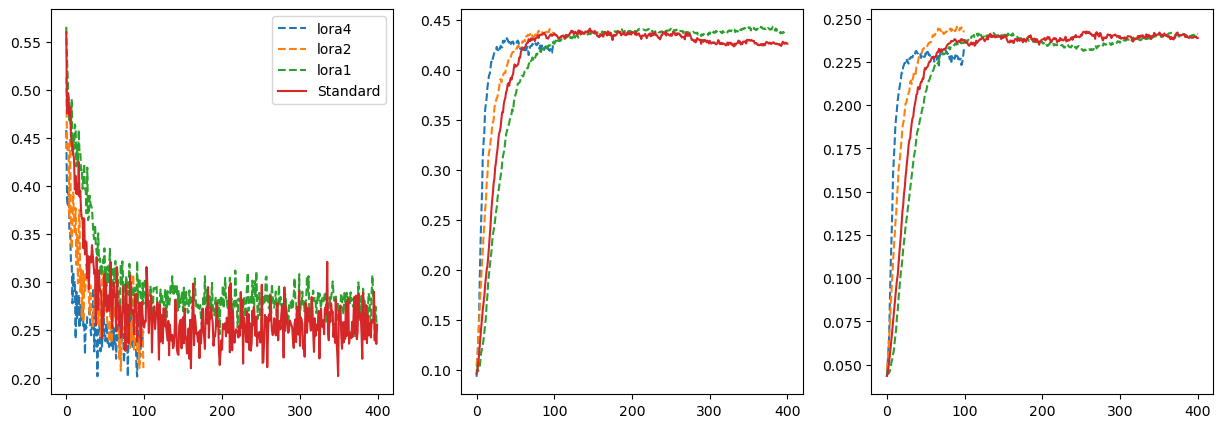

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

def plot_metrics(df, label, style='--'):
    axes[0].plot(df["loss"], label=label, linestyle=style)
    axes[1].plot(df["hr@10"], label=label, linestyle=style)
    axes[2].plot(df["ndcg@10"], label=label, linestyle=style)

plot_metrics(lora4_hist, "lora4")
plot_metrics(lora2_hist, "lora2")
plot_metrics(lora1_hist, "lora1")
plot_metrics(standard_hist, "Standard", style='-')

axes[0].legend()


In [8]:
# ===================================================================
#                      Kernel Shape Output Shape   Params Mult-Adds
# Layer                                                            
# 0_mf_embedding_user    [16, 6040]      [2, 16]   96.64k    96.64k
# 1_mf_embedding_item    [16, 3706]      [2, 16]  14.888k   59.296k
# 2_mlp_embedding_user   [32, 6040]      [2, 32]  193.28k   193.28k
# 3_mlp_embedding_item   [32, 3706]      [2, 32]  14.952k  118.592k
# 4_mlp.Linear_0           [64, 32]      [2, 32]    2.08k    2.048k
# 5_mlp.ReLU_1                    -      [2, 32]        -         -
# 6_mlp.Linear_2           [32, 16]      [2, 16]    528.0     512.0
# 7_mlp.ReLU_3                    -      [2, 16]        -         -
# 8_mlp.Linear_4            [16, 8]       [2, 8]    136.0     128.0
# 9_mlp.ReLU_5                    -       [2, 8]        -         -
# 10_output_layer           [24, 1]       [2, 1]     25.0      24.0
# -------------------------------------------------------------------
#                         Totals
# Total params          500.417k
# Trainable params      322.529k
# Non-trainable params  177.888k
# Mult-Adds              470.52k
# ===================================================================